**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


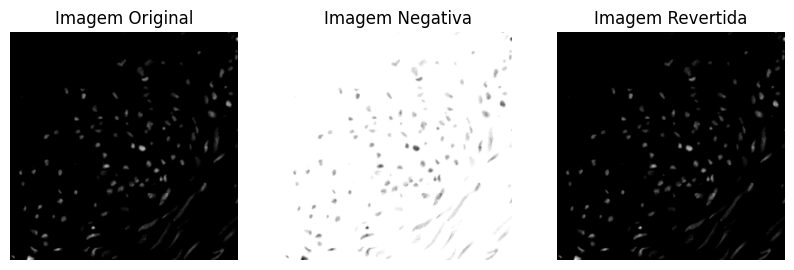

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)

# Negativar a imagem
image_negative = 255 - image

# Reverter o negativo para a imagem original
image_reverted = 255 - image_negative

# Aplicar transformação logarítmica
c = 255 / np.log(1 + np.max(image))
image_log = c * np.log(1 + image)

# Normalizar para a faixa de 0 a 255 e converter para uint8
image_log = np.array(image_log, dtype=np.uint8)

# Plote as imagens lado a lado
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_negative, cmap='gray')
plt.title('Imagem Negativa')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_reverted, cmap='gray')
plt.title('Imagem Revertida')
plt.axis('off')

plt.show()

A imagem em que os objetos são mais perceptivos são na imagem Negativa, pois ao invertê-la, o contraste entre os objetos da imagem e do fundo aumenta, deixando-os mais perceptivos.

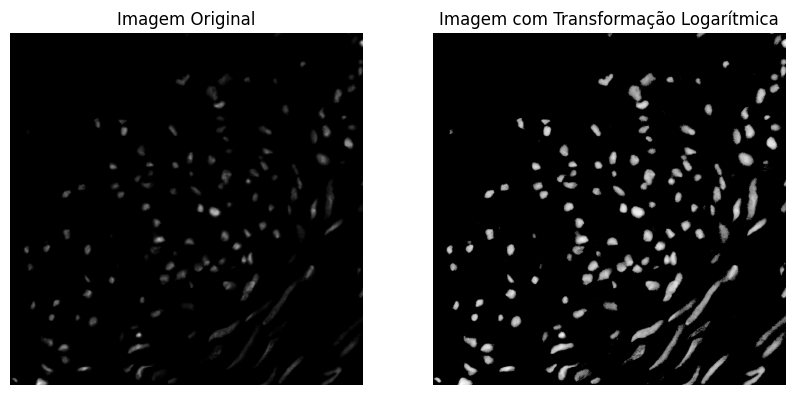

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_log, cmap='gray')
plt.title('Imagem com Transformação Logarítmica')
plt.axis('off')

plt.show()

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



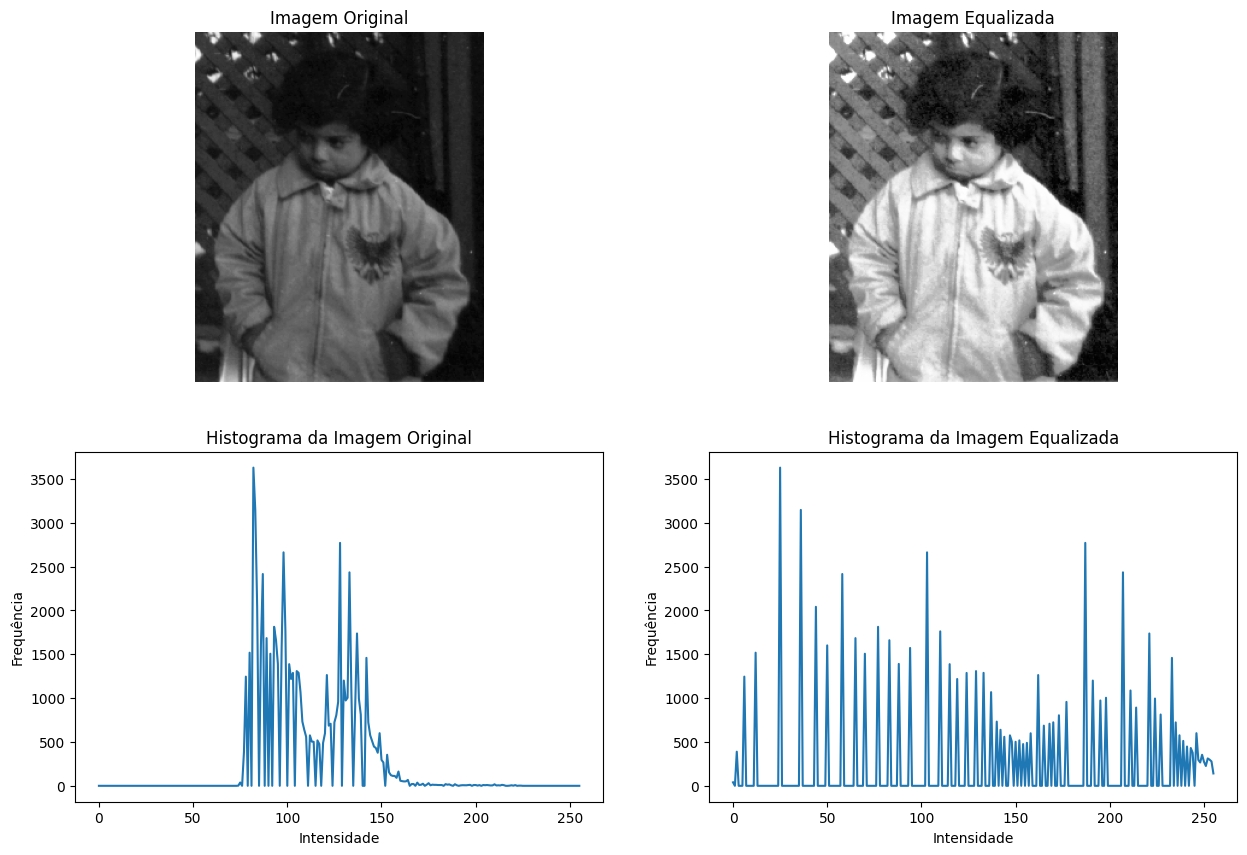

In [17]:
#Carregar a imagem 
pout = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

# Calcular o histograma da imagem original
hist_original = cv2.calcHist([pout], [0], None, [256], [0, 256])

#Equalizar a imagem
image_eq = cv2.equalizeHist(pout)

# Calcular o histograma da imagem equalizada
hist_equalized = cv2.calcHist([image_eq], [0], None, [256], [0, 256])

#Plotar as imagens
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(pout, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image_eq, cmap='gray')
plt.title('Imagem Equalizada')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(hist_original)
plt.title('Histograma da Imagem Original')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')

plt.subplot(2, 2, 4)
plt.plot(hist_equalized)
plt.title('Histograma da Imagem Equalizada')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')

plt.show()

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

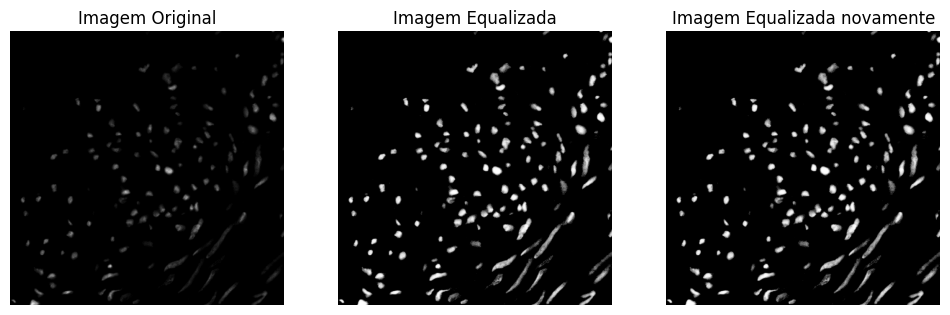

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def equalizar_histograma(imagem):
    """
    Aplica a equalização de histograma a uma imagem em tons de cinza.
    
    Parâmetros:
    imagem (numpy.ndarray): A imagem em tons de cinza (2D array).
    
    Retorna:
    numpy.ndarray: A imagem equalizada.
    """
    # Passo 1: Calcular o histograma da imagem
    histogram = np.zeros(256, dtype=int)
    for pixel_value in imagem.flatten():
        histogram[pixel_value] += 1

    # Passo 2: Calcular a CDF (Função de Distribuição Acumulada)
    cdf = np.zeros(256, dtype=float)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]

    # Passo 3: Normalizar a CDF
    cdf_min = cdf[cdf > 0].min()
    cdf_max = cdf[-1]
    cdf_normalized = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
    cdf_normalized = np.clip(cdf_normalized, 0, 255).astype(np.uint8)

    # Passo 4: Aplicar a CDF para equalizar a imagem
    imagem_equalizada = cdf_normalized[imagem]

    return imagem_equalizada

# Carregar a imagem em tons de cinza
imagem = cv2.imread('im_cells.png', cv2.IMREAD_GRAYSCALE)

# Aplicar a equalização de histograma
imagem_equalizada = equalizar_histograma(imagem)
imagem_equalizada2 = equalizar_histograma(imagem_equalizada)

# Exibir a imagem original e a imagem equalizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(imagem, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagem Equalizada')
plt.imshow(imagem_equalizada, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Imagem Equalizada novamente')
plt.imshow(imagem_equalizada2, cmap='gray')
plt.axis('off')

plt.show()
